Decision Tree

Tiatnic Survival Dataset

# Import the Necessary Libraries

In [233]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [234]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [235]:
y= df['Survived']
X= df.drop(columns=['Survived'])

In [236]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [237]:
df.shape

(891, 12)

# Load the data sets- train and test 

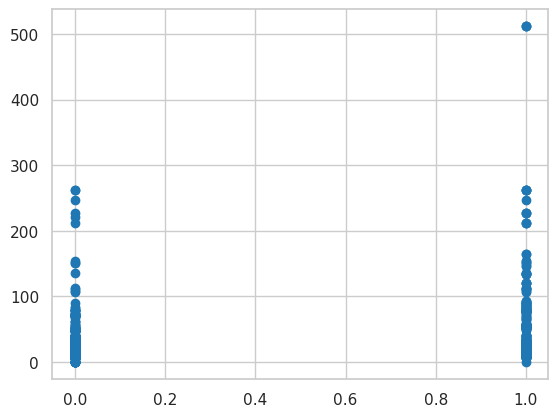

In [238]:
x_train, x_test,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

plt.scatter(y,X['Fare'])
plt.show()

# Look at top values of train data 

In [239]:
x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
650,651,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
784,785,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
125,126,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
54,55,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
446,447,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S


# Print the column names of train data

In [240]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Print the dimension of train and test data

In [241]:
print("The train data",x_train.shape)
print("The test data",x_test.shape)

The train data (623, 11)
The test data (268, 11)


# Print the number of missing values in each column of train and test data

In [242]:
x_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            126
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         1
dtype: int64

In [243]:
x_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             51
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          208
Embarked         1
dtype: int64

## Data Visualization

# Barchart of Survived, Pclass, Sex, Embarked

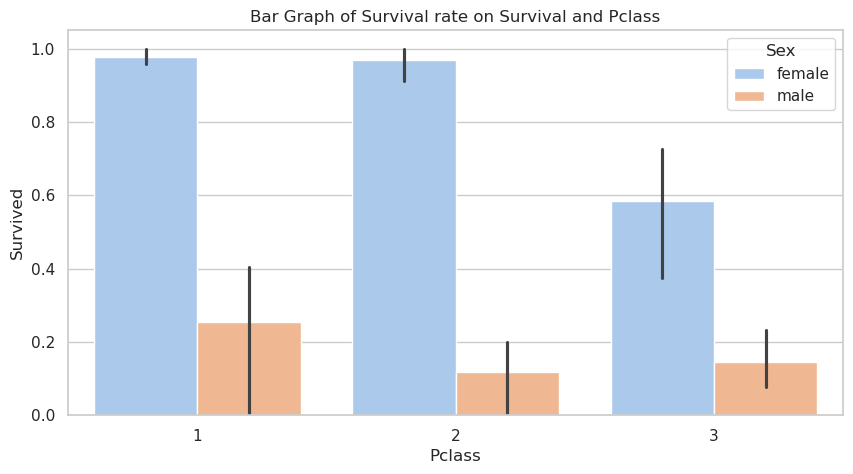

In [244]:
groupby = df.groupby(['Embarked','Pclass','Sex'])['Survived'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=groupby,palette='pastel')
plt.title("Bar Graph of Survival rate on Survival and Pclass")
plt.show()

# Histogram of Age, Parch, Fare

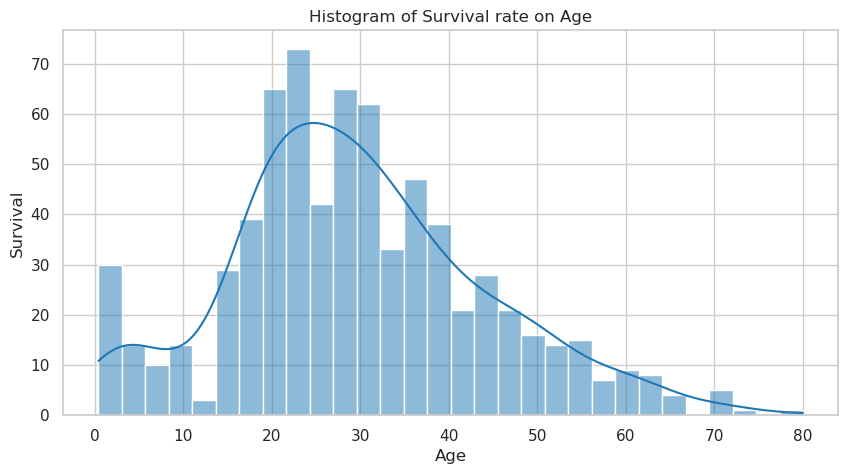

In [245]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],bins=30,kde=True,)
#sns.histplot(df['Parch'],bins=30,kde=True,)
#sns.histplot(df['Fare'],bins=30,kde=True,)
plt.title("Histogram of Survival rate on Age")
plt.xlabel('Age')
plt.ylabel('Survival')
plt.show()

# Plot histogram of age for survived and did not survived class

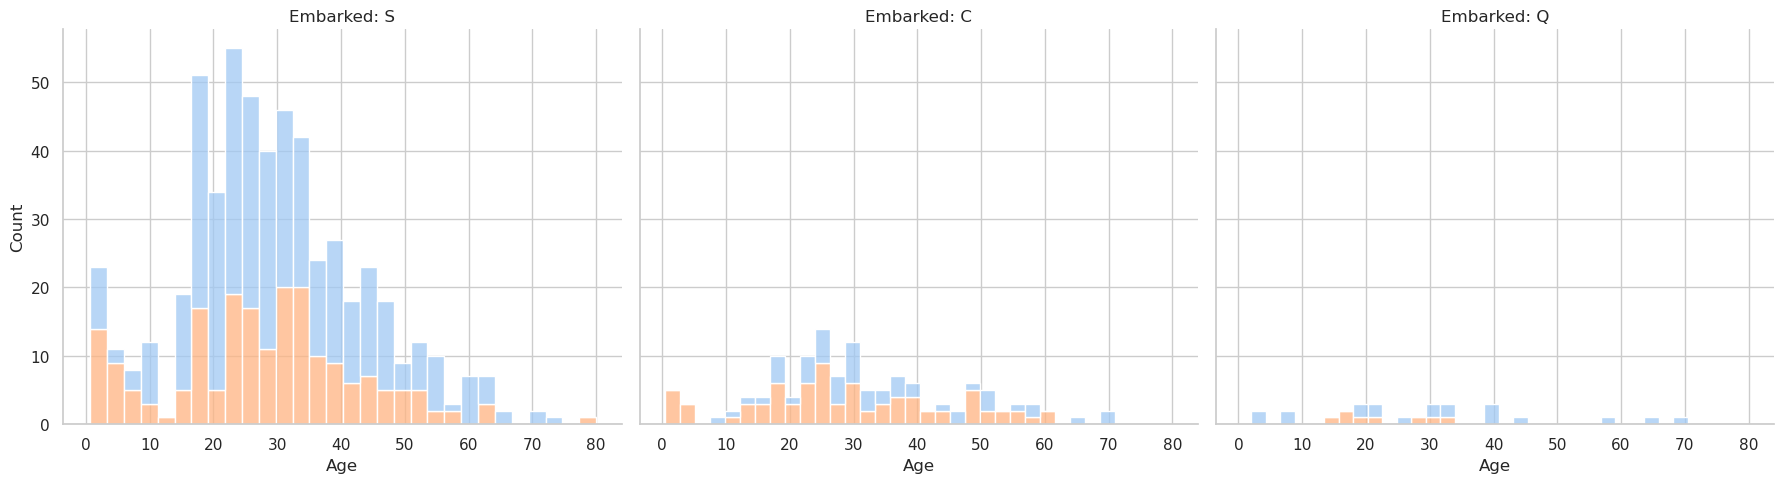

In [246]:
g = sns.FacetGrid(df,col='Embarked',height=5,aspect=1.2)
g.map_dataframe(sns.histplot,x='Age',hue='Survived',multiple='stack',bins=30,palette='pastel')

g.set_axis_labels('Age','Count')
g.set_titles('Embarked: {col_name}')
plt.show()

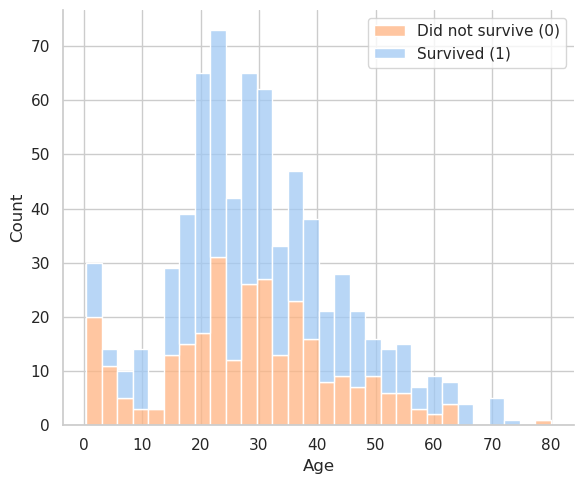

In [247]:
g = sns.FacetGrid(df,height=5,aspect=1.2)
g.map_dataframe(sns.histplot,x='Age',hue='Survived',multiple='stack',bins=30,palette='pastel')

g.set_axis_labels('Age','Count')
g.set_titles('Survived: {col_name}')
plt.legend(labels=['Did not survive (0)','Survived (1)'])
plt.show()

# Count class and geder wise survival rate - plot with appropriate chart
# Age wise Distribution of Male and Female passengers

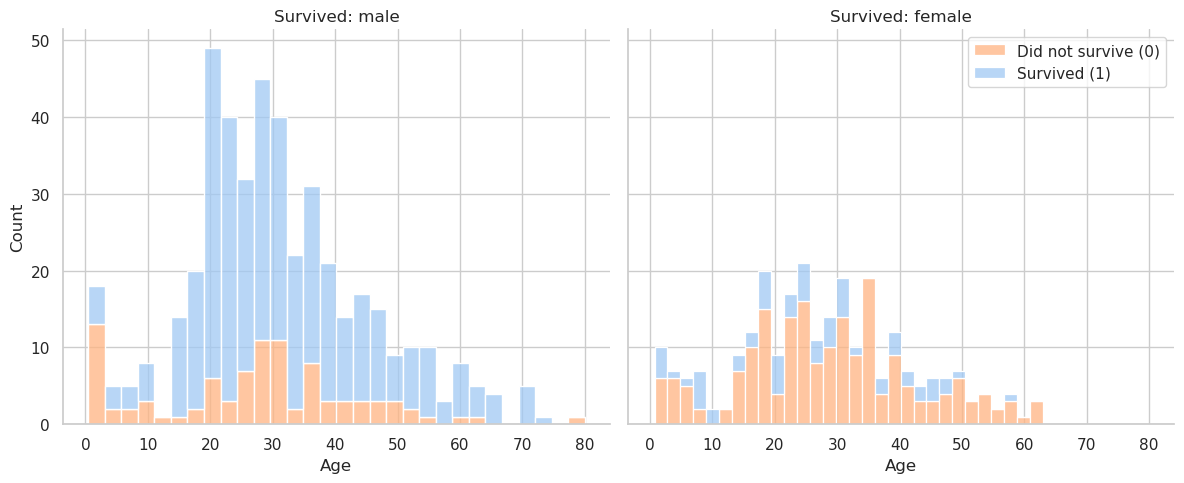

In [248]:
g = sns.FacetGrid(df,col='Sex',height=5,aspect=1.2)
g.map_dataframe(sns.histplot,x='Age',hue='Survived',multiple='stack',bins=30,palette='pastel')

g.set_axis_labels('Age','Count')
g.set_titles('Survived: {col_name}')
plt.legend(labels=['Did not survive (0)','Survived (1)'])
plt.show()

### Histogram of Age of the given data set(sample)

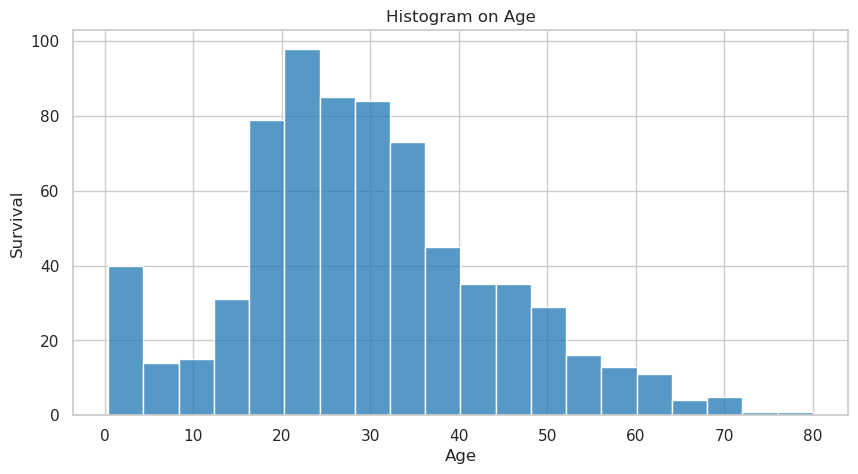

In [249]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'])
#sns.histplot(df['Parch'],bins=30,kde=True,)
#sns.histplot(df['Fare'],bins=30,kde=True,)
plt.title("Histogram on Age")
plt.xlabel('Age')
plt.ylabel('Survival')
plt.show()

## Handling Missing Values

### Replace the msiing values in Embarked column by 'S'


In [250]:
df['Embarked'] = df['Embarked'].fillna("S")

In [251]:
df['Embarked'].isnull().sum()

0

### Impute the missing values in Fare column with median value


In [252]:
df['Fare'].isnull().sum()

0

### Impute the Age column. It has too many missing values but it may be important. 
### We fill the missing values with numbers randomly drawn from distribution
### that has same mean and standard deviation as non missing Age data

In [253]:
missing_age =df['Age'].isnull().sum()
mean_age = df['Age'].mean()
std_age = df['Age'].std()

random_values = np.random.normal(mean_age,std_age,size=missing_age)
df.loc[df['Age'].isnull(),'Age'] =random_values

In [254]:
df['Age'].isnull().sum()

0

## Feature Engineering - Creating new features

### Create and add a new feature FamilySize as a combination of SibSp and Parch
### FamilySize = Parch + SibSp + 1

In [255]:
df["FamilySize"] = df["Parch"]+df["SibSp"]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.721324,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


### Create new feature IsAlone from FamilySize
### If FamilySize == 1 then IsAlone = True else IsAlone = False

In [256]:
df['IsAlone'] = df['FamilySize'] == 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.721324,1,2,W./C. 6607,23.4500,NaN,S,3,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,False


### Create a new attribute Has_cabin using the attribue Cabin. 
### if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [257]:
df['Has_cabin'] =  df['Cabin'].notna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,True,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,True,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.721324,1,2,W./C. 6607,23.4500,NaN,S,3,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,False,True



### Drop the columns which may not be useful in prediction of survival
### Drop PassengerId, Name, Ticket, and Cabin

In [258]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [259]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22.000000,1,0,7.2500,S,1,True,False
1,1,1,female,38.000000,1,0,71.2833,C,1,True,True
2,1,3,female,26.000000,0,0,7.9250,S,0,False,False
3,1,1,female,35.000000,1,0,53.1000,S,1,True,True
4,0,3,male,35.000000,0,0,8.0500,S,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0,False,False
887,1,1,female,19.000000,0,0,30.0000,S,0,False,True
888,0,3,female,28.721324,1,2,23.4500,S,3,False,False
889,1,1,male,26.000000,0,0,30.0000,C,0,False,True


## Model Building

### Prepare X and y

In [260]:
X = df.drop(columns='Survived')
y = df['Survived']

### Label encoding of categorical features


In [261]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Sex', 'Embarked','IsAlone','Has_cabin']

for col in categorical_columns:
    df[col+"_encoded"] = label_encoder.fit_transform(df[col])

df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin,Sex_encoded,Embarked_encoded,IsAlone_encoded,Has_cabin_encoded
0,0,3,male,22.000000,1,0,7.2500,S,1,True,False,1,2,1,0
1,1,1,female,38.000000,1,0,71.2833,C,1,True,True,0,0,1,1
2,1,3,female,26.000000,0,0,7.9250,S,0,False,False,0,2,0,0
3,1,1,female,35.000000,1,0,53.1000,S,1,True,True,0,2,1,1
4,0,3,male,35.000000,0,0,8.0500,S,0,False,False,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0,False,False,1,2,0,0
887,1,1,female,19.000000,0,0,30.0000,S,0,False,True,0,2,0,1
888,0,3,female,28.721324,1,2,23.4500,S,3,False,False,0,2,0,0
889,1,1,male,26.000000,0,0,30.0000,C,0,False,True,1,0,0,1


### concat df_categorical with original df

In [262]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin,Sex_encoded,Embarked_encoded,IsAlone_encoded,Has_cabin_encoded
0,0,3,male,22.000000,1,0,7.2500,S,1,True,False,1,2,1,0
1,1,1,female,38.000000,1,0,71.2833,C,1,True,True,0,0,1,1
2,1,3,female,26.000000,0,0,7.9250,S,0,False,False,0,2,0,0
3,1,1,female,35.000000,1,0,53.1000,S,1,True,True,0,2,1,1
4,0,3,male,35.000000,0,0,8.0500,S,0,False,False,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0,False,False,1,2,0,0
887,1,1,female,19.000000,0,0,30.0000,S,0,False,True,0,2,0,1
888,0,3,female,28.721324,1,2,23.4500,S,3,False,False,0,2,0,0
889,1,1,male,26.000000,0,0,30.0000,C,0,False,True,1,0,0,1


### Do a pairplot of all features

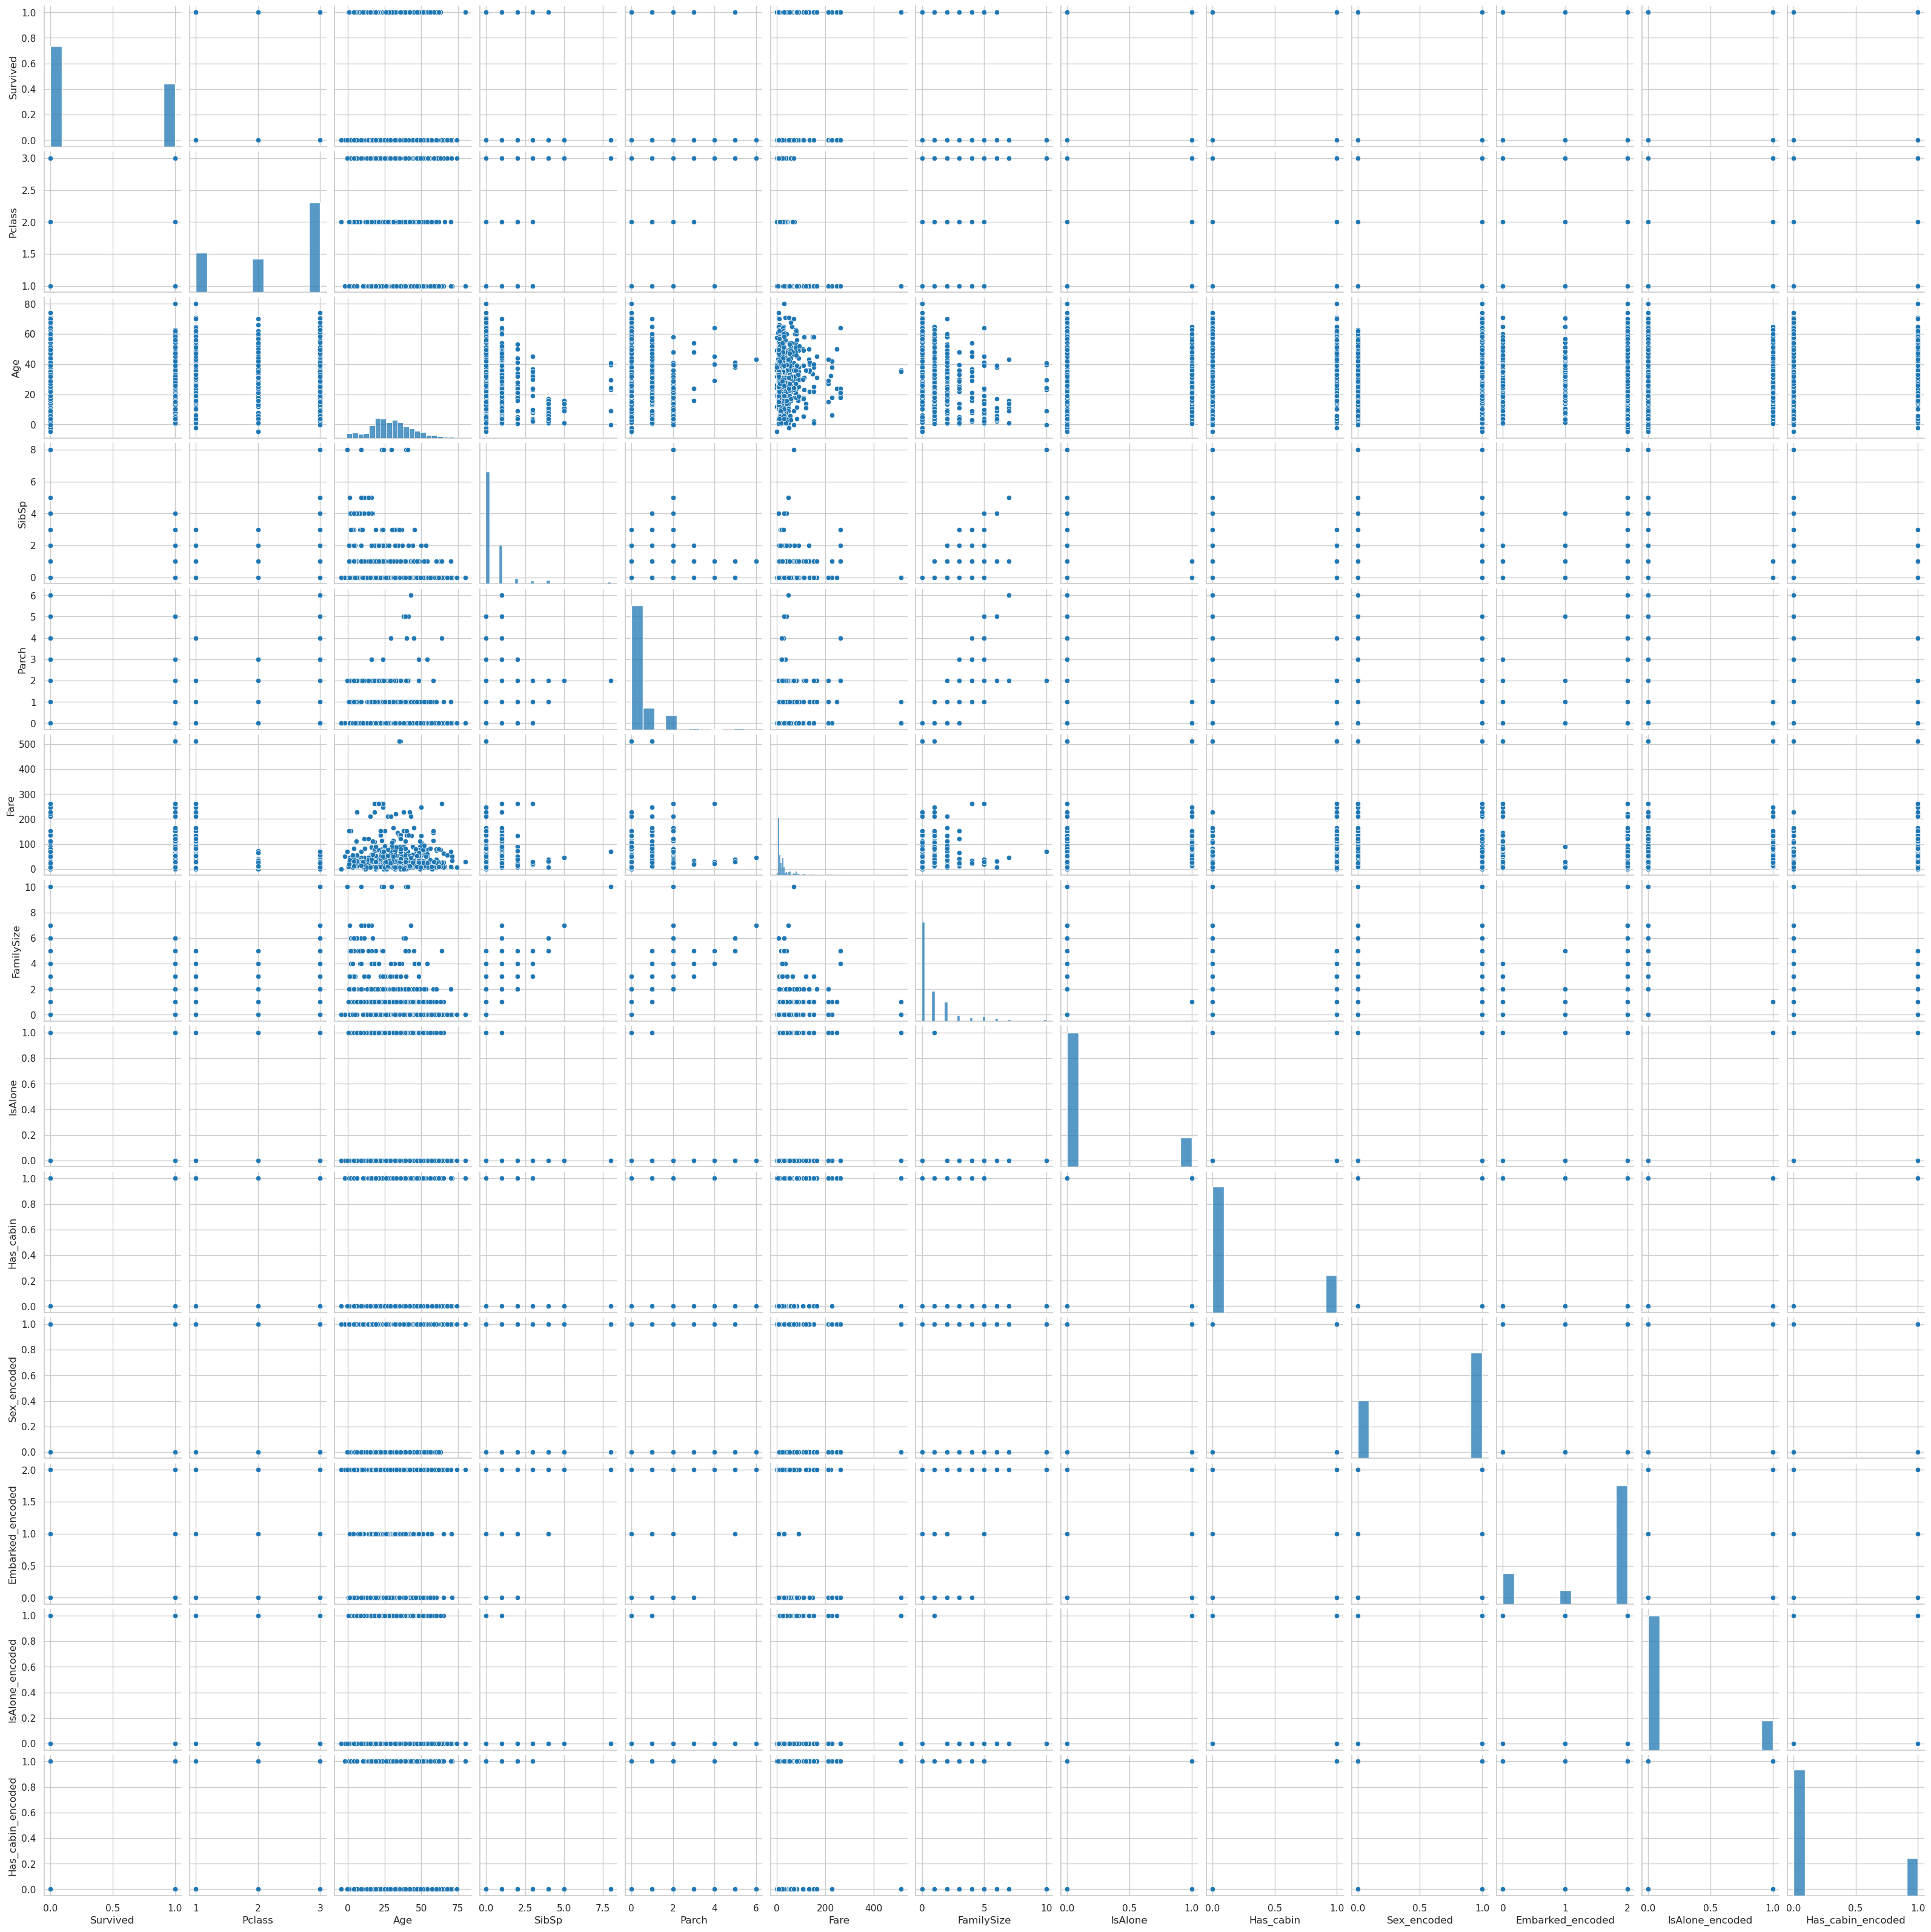

In [263]:
sns.pairplot(df)
plt.show()

In [272]:
X = df.drop(columns=['Survived','IsAlone','Has_cabin','Sex','Embarked'])
y = df['Survived']
X

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_encoded,Embarked_encoded,IsAlone_encoded,Has_cabin_encoded
0,3,22.000000,1,0,7.2500,1,1,2,1,0
1,1,38.000000,1,0,71.2833,1,0,0,1,1
2,3,26.000000,0,0,7.9250,0,0,2,0,0
3,1,35.000000,1,0,53.1000,1,0,2,1,1
4,3,35.000000,0,0,8.0500,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,2,0,0
887,1,19.000000,0,0,30.0000,0,0,2,0,1
888,3,28.721324,1,2,23.4500,3,0,2,0,0
889,1,26.000000,0,0,30.0000,0,1,0,0,1


### Splitting the data into train and validation set - 90% train 10% validation
### X_train, X_test, y_train, y_validation


In [275]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=44)


### Create the model
### Fitting the decision tree with default hyperparameters
### Importing decision tree classifier from sklearn library

In [316]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Print the tree

### Importing required packages for visualization


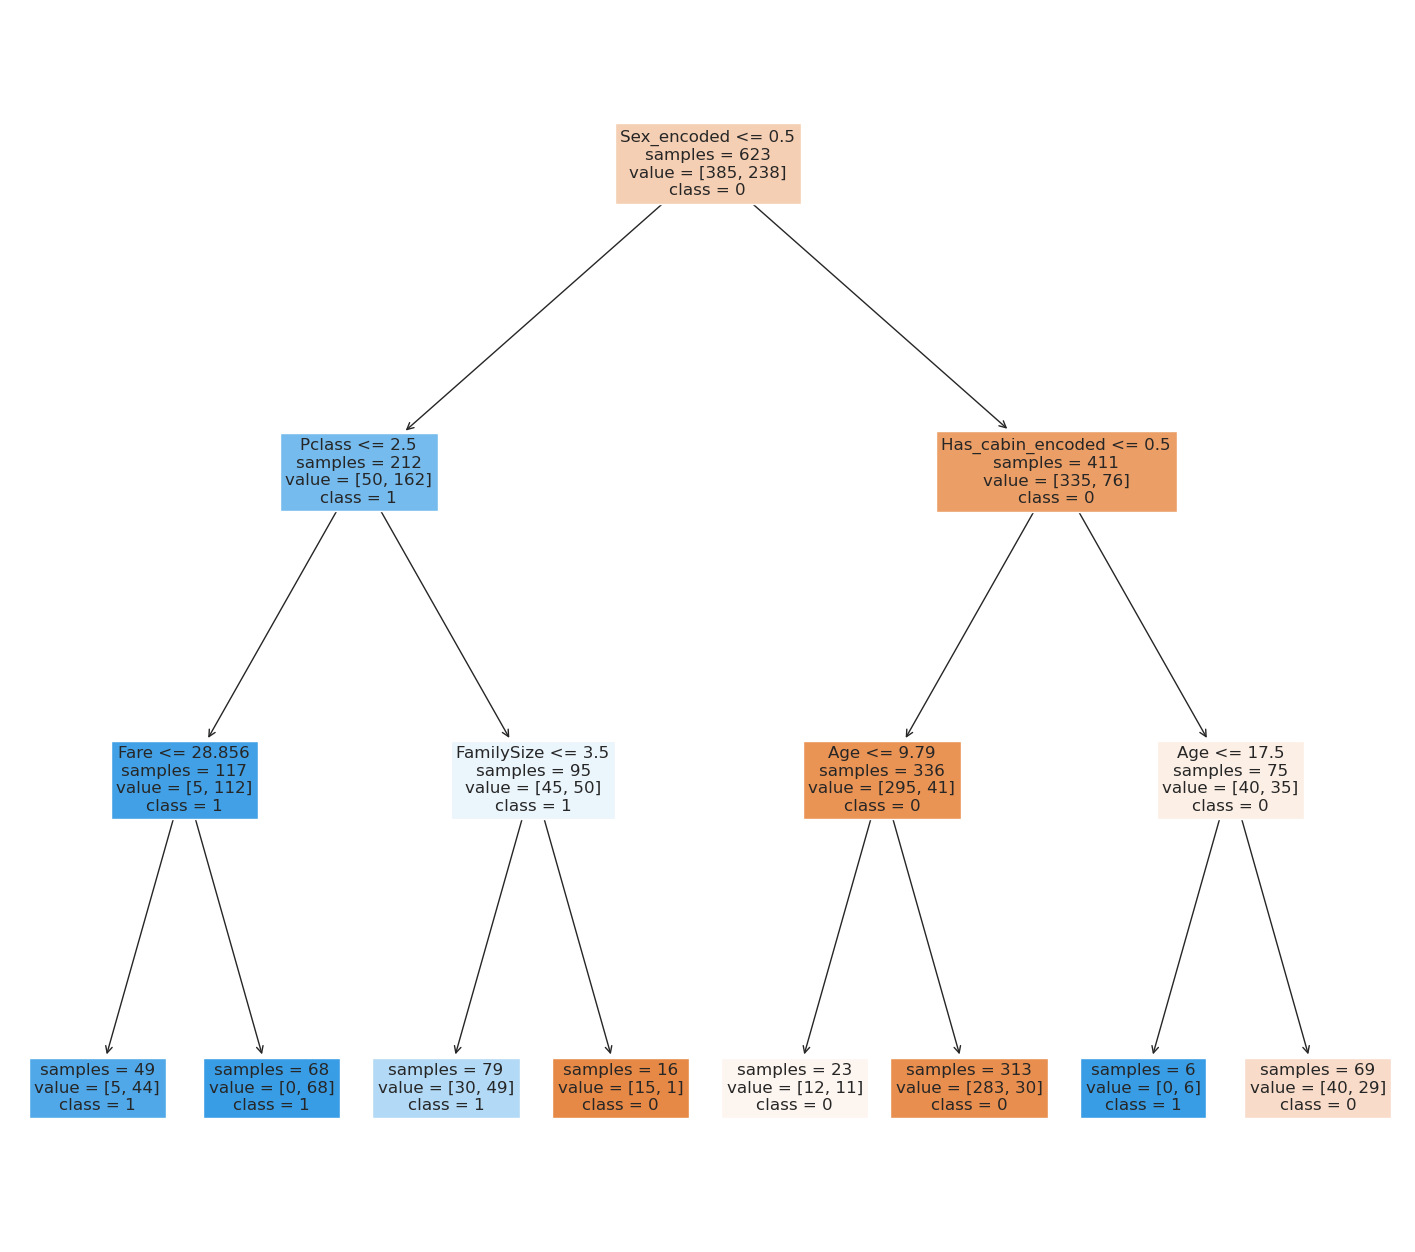

In [317]:
class_names = [str(i) for i in clf.classes_]


plt.figure(figsize=(18,16))


plot_tree(clf, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=class_names,
          fontsize=12,      
          impurity=False,   
          proportion=False) 


plt.show()

In [300]:
y_train.value_counts()

Survived
0    385
1    238
Name: count, dtype: int64

In [289]:
set(X_train['Pclass'])

{1, 2, 3}

### plotting tree with max_depth=3

<img src="tree2.png">

### Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

### Importing classification report and confusion matrix from sklearn metrics

### Making predictions

### Printing classification report

### Printing confusion matrix and accuracy

In [295]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


print("\nAccuracy: {:.2f}%".format(accuracy * 100))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[141  23]
 [ 32  72]]

Accuracy: 79.48%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       164
           1       0.76      0.69      0.72       104

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



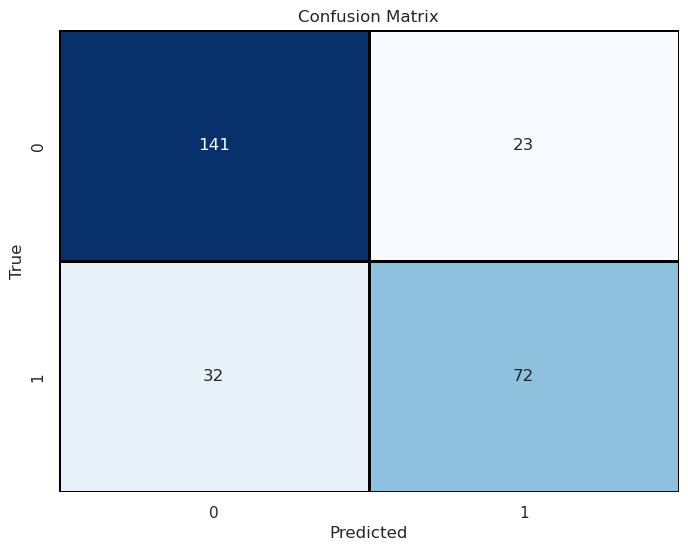

In [319]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, linewidths=1, linecolor='black')


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()